# Portfolio Universe Analysis - PowerPoint Report Generator
This notebook creates visualizations using Seaborn and generates a PowerPoint presentation with the results.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor

# Set style for better looking charts
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Read the most recent data file
base_dir = Path("Universe Data")
file_path = max(
    base_dir.glob("P123_Screen_*.csv"),
    key=lambda p: p.stat().st_mtime
)

# Read metadata from first 3 lines
with file_path.open("r", encoding="utf-8-sig") as f:
    lines = [line.rstrip("\n") for line in f]

def clean_metadata_line(line):
    parts = [p.strip() for p in line.split(",")]
    for p in parts:
        if p:
            return p
    return None

metadata = {
    "title": clean_metadata_line(lines[0]) if len(lines) > 0 else None,
    "date": clean_metadata_line(lines[1]) if len(lines) > 1 else None,
    "notes": clean_metadata_line(lines[2]) if len(lines) > 2 else None,
}

print(f"Screen: {metadata['title']}")
print(f"Date: {metadata['date']}")
print(f"File: {file_path.name}")

Screen: Quality Momentum Univ Part I 4bn MktCap / 100k Liq
Date: 28/01/2026
File: P123_Screen_322558_20260128.csv


In [3]:
# Read the dataframe
df = pd.read_csv(file_path, skiprows=3)
df = df.loc[:, ~df.columns.str.startswith("Unnamed")]

# Convert MktCap to numeric
df['MktCap'] = pd.to_numeric(df['MktCap'].astype(str).str.replace(',', ''), errors='coerce')

# Convert yield columns to numeric
df['EarnYield'] = pd.to_numeric(df['EarnYield'].astype(str).str.replace(',', ''), errors='coerce')
df['FCFYield'] = pd.to_numeric(df['FCFYield'].astype(str).str.replace(',', ''), errors='coerce')

print(f"Total stocks: {len(df):,}")
print(f"\nColumns: {list(df.columns)}")
df.head(10)

Total stocks: 3,158

Columns: ['#', 'Ticker', 'Name', 'Last', 'MktCap', 'SectorCode', 'SubSectorCode', 'IndCode', 'EarnYield', 'FCFYield']


,#,Ticker,Name,Last,MktCap,SectorCode,SubSectorCode,IndCode,EarnYield,FCFYield
0,1,AAMI:USA,"Acadian Asset Management, Inc.",55.57,1984.35,FINANCIAL,INVESTSVCESS,INVESTSVCE,4.27,11.15
1,2,AAOI:USA,"Applied Optoelectronics, Inc.",37.39,2544.95,TECH,ELECTRONIC,COMPONENTS,-8.63,-12.77
2,3,AAP:USA,"Advance Auto Parts, Inc.",49.34,2960.40,CYCLICALS,RETAILMISC,AUTORETAIL,-12.79,-13.56
3,4,AARD:USA,"Aardvark Therapeutics, Inc.",14.70,319.66,HEALTHCARE,BIOPHARMA,BIOPHARMAOTHER,-15.28,-15.25
4,5,AAT:USA,"American Assets Trust, Inc.",18.05,1103.80,FINANCIAL,REALESTATE,REIT,5.63,6.74
5,6,AAUC:USA,Allied Gold Corp. (Canada),31.70,3705.80,MATERIALS,MINING,ORE,-1.05,-0.65
6,7,ABAT:USA,American Battery Technology Co.,4.75,571.48,MATERIALS,MINING,ORE,-10.72,-6.24
7,8,ABCL:USA,"AbCellera Biologics, Inc.",3.99,1193.06,HEALTHCARE,BIOPHARMA,BIOPHARMAOTHER,-14.44,-12.74
8,9,ABEO:USA,"Abeona Therapeutics, Inc.",5.11,267.77,HEALTHCARE,BIOPHARMA,BIOPHARMASYS,22.80,-29.71
9,10,ABM:USA,"ABM Industries, Inc.",45.39,2731.42,BIZSVCE,BIZSVCESS,BIZSUPPORT,5.70,5.51


In [4]:
# Calculate key statistics
total_stocks = len(df)
total_mktcap = df['MktCap'].sum()
avg_mktcap = df['MktCap'].mean()
median_mktcap = df['MktCap'].median()
num_sectors = df['SectorCode'].nunique()

print(f"Total Stocks: {total_stocks:,}")
print(f"Total Market Cap: ${total_mktcap:,.2f}M")
print(f"Average Market Cap: ${avg_mktcap:,.2f}M")
print(f"Median Market Cap: ${median_mktcap:,.2f}M")
print(f"Number of Sectors: {num_sectors}")

Total Stocks: 3,158
Total Market Cap: $2,984,782.08M
Average Market Cap: $945.15M
Median Market Cap: $431.30M
Number of Sectors: 12


## Create Visualizations

In [5]:
# Create output directory for charts
chart_dir = Path("charts")
chart_dir.mkdir(exist_ok=True)
print(f"Charts will be saved to: {chart_dir.absolute()}")

Charts will be saved to: /Users/Lars/Documents/Python/VirtualPy/01 - General Projects/02 - Portfolio 123 Code/Universe_Review/charts


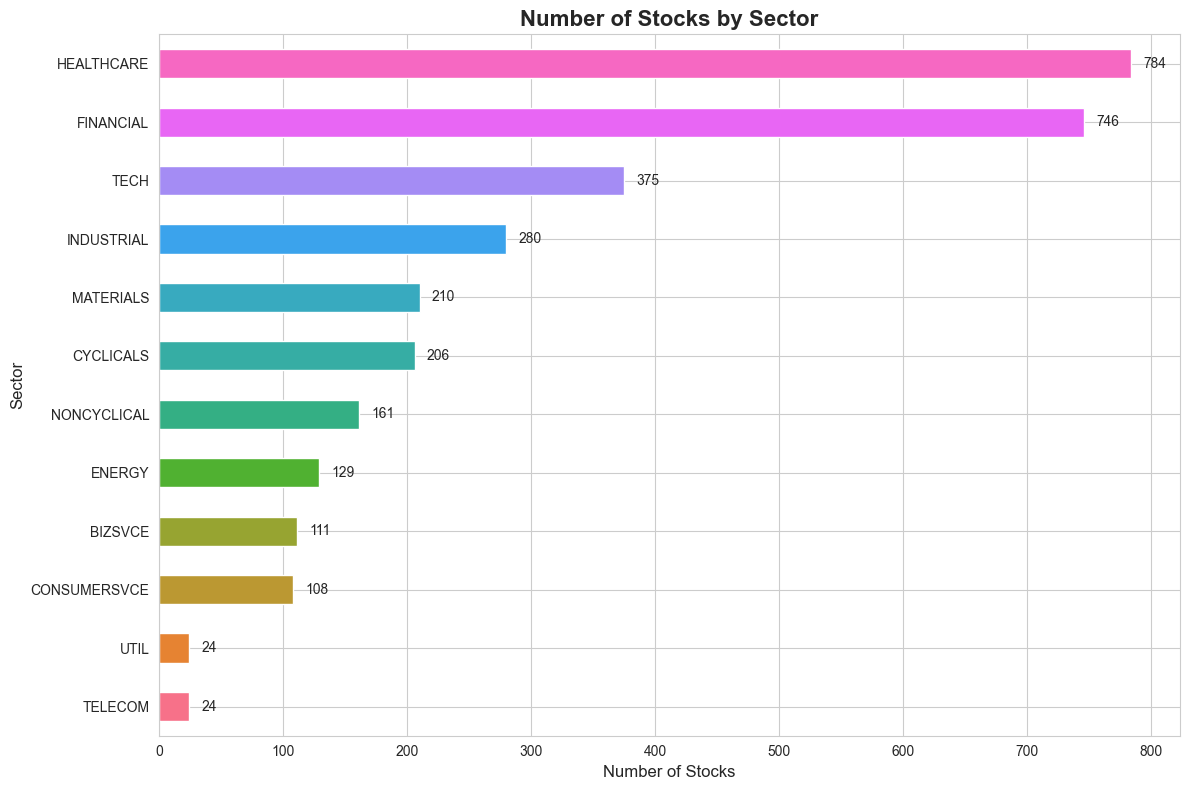

In [6]:
# Chart 1: Sector Distribution (Count)
plt.figure(figsize=(12, 8))
sector_counts = df['SectorCode'].value_counts().sort_values(ascending=True)
ax = sector_counts.plot(kind='barh', color=sns.color_palette("husl", len(sector_counts)))
plt.title('Number of Stocks by Sector', fontsize=16, fontweight='bold')
plt.xlabel('Number of Stocks', fontsize=12)
plt.ylabel('Sector', fontsize=12)

# Add value labels on bars
for i, v in enumerate(sector_counts):
    ax.text(v + 10, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.savefig(chart_dir / 'sector_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

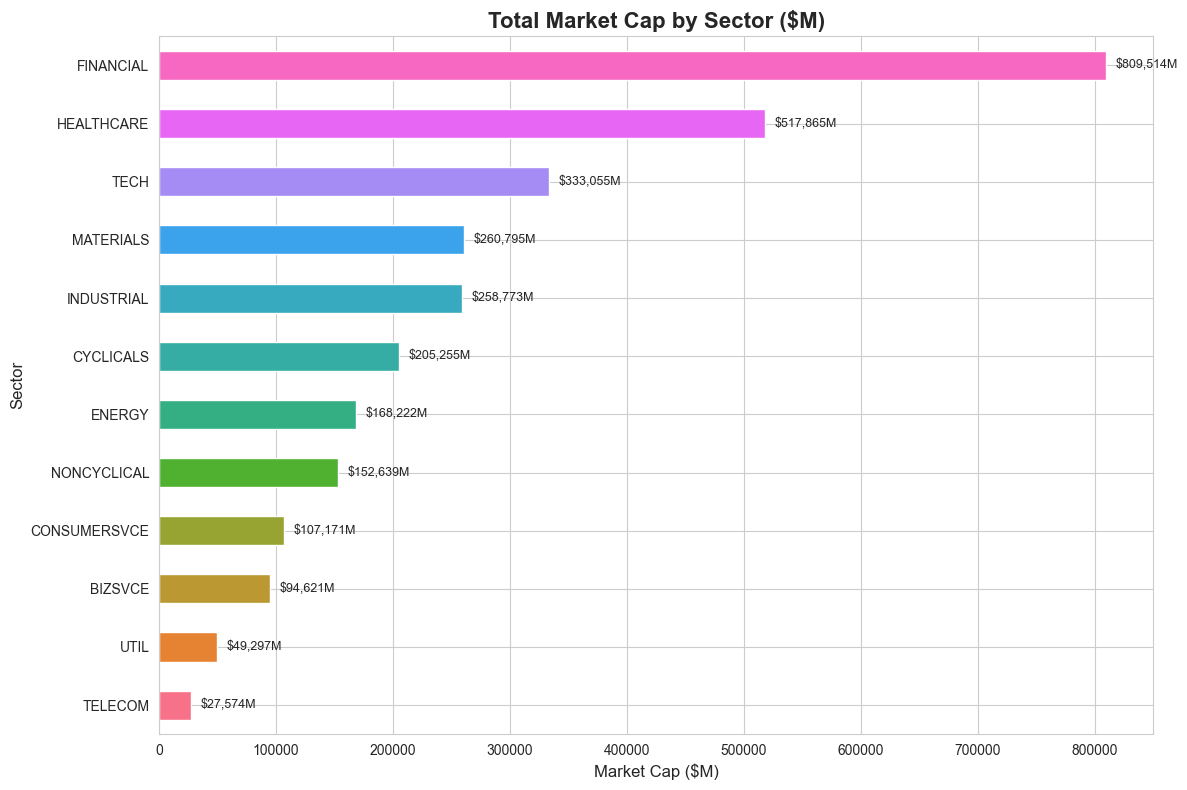

In [7]:
# Chart 2: Sector Market Cap Distribution
plt.figure(figsize=(12, 8))
sector_mktcap = df.groupby('SectorCode')['MktCap'].sum().sort_values(ascending=True)
ax = sector_mktcap.plot(kind='barh', color=sns.color_palette("husl", len(sector_mktcap)))
plt.title('Total Market Cap by Sector ($M)', fontsize=16, fontweight='bold')
plt.xlabel('Market Cap ($M)', fontsize=12)
plt.ylabel('Sector', fontsize=12)

# Add value labels on bars
for i, v in enumerate(sector_mktcap):
    ax.text(v + max(sector_mktcap)*0.01, i, f'${v:,.0f}M', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(chart_dir / 'sector_marketcap.png', dpi=300, bbox_inches='tight')
plt.show()

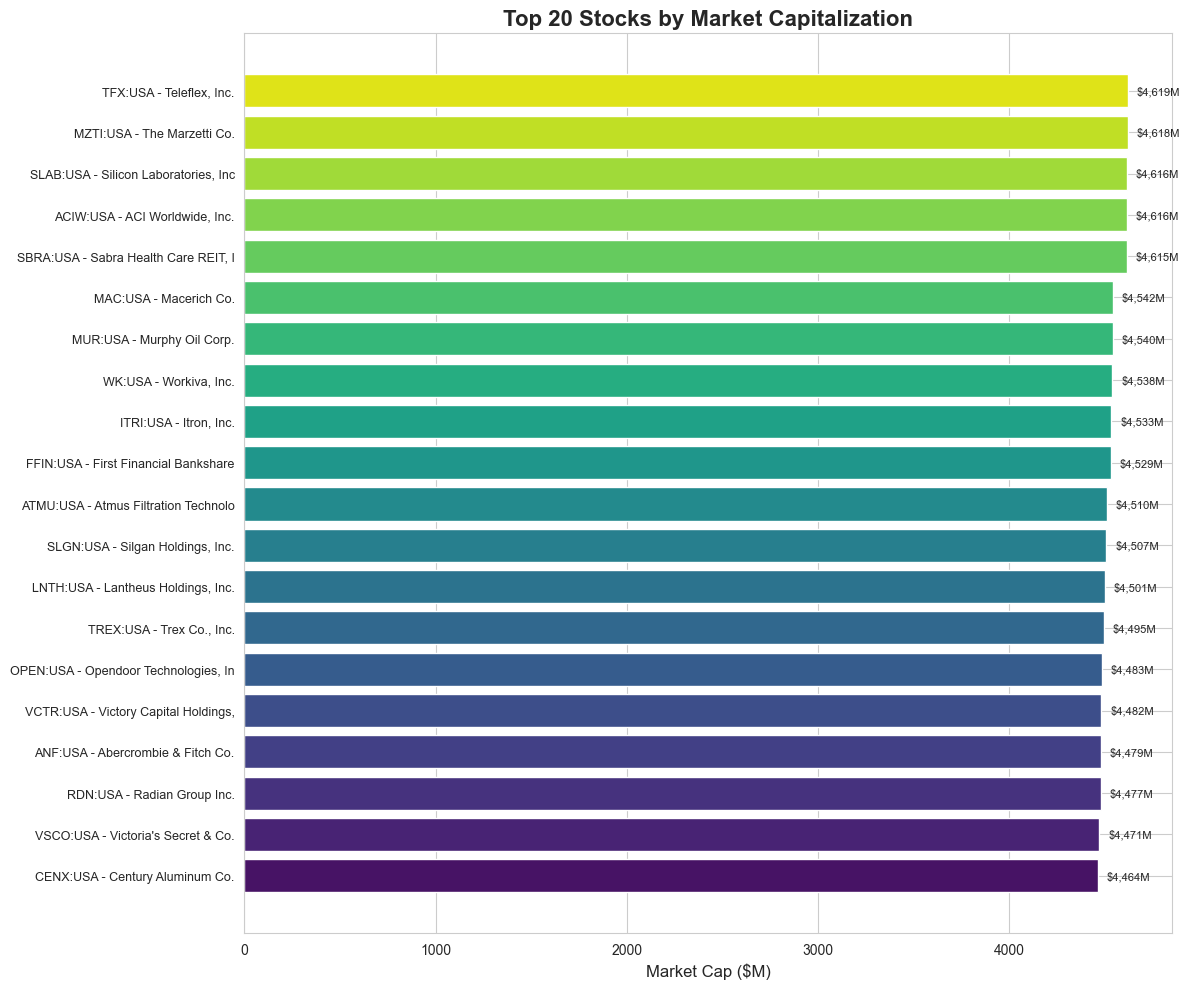

In [8]:
# Chart 3: Top 20 Stocks by Market Cap
plt.figure(figsize=(12, 10))
top_20 = df.nlargest(20, 'MktCap')[['Ticker', 'Name', 'MktCap']].copy()
top_20['Label'] = top_20['Ticker'] + ' - ' + top_20['Name'].str[:25]
top_20 = top_20.sort_values('MktCap', ascending=True)

ax = plt.barh(range(len(top_20)), top_20['MktCap'], color=sns.color_palette("viridis", len(top_20)))
plt.yticks(range(len(top_20)), top_20['Label'], fontsize=9)
plt.xlabel('Market Cap ($M)', fontsize=12)
plt.title('Top 20 Stocks by Market Capitalization', fontsize=16, fontweight='bold')

# Add value labels
for i, (idx, row) in enumerate(top_20.iterrows()):
    plt.text(row['MktCap'] + max(top_20['MktCap'])*0.01, i, f"${row['MktCap']:,.0f}M", 
             va='center', fontsize=8)

plt.tight_layout()
plt.savefig(chart_dir / 'top_20_stocks.png', dpi=300, bbox_inches='tight')
plt.show()

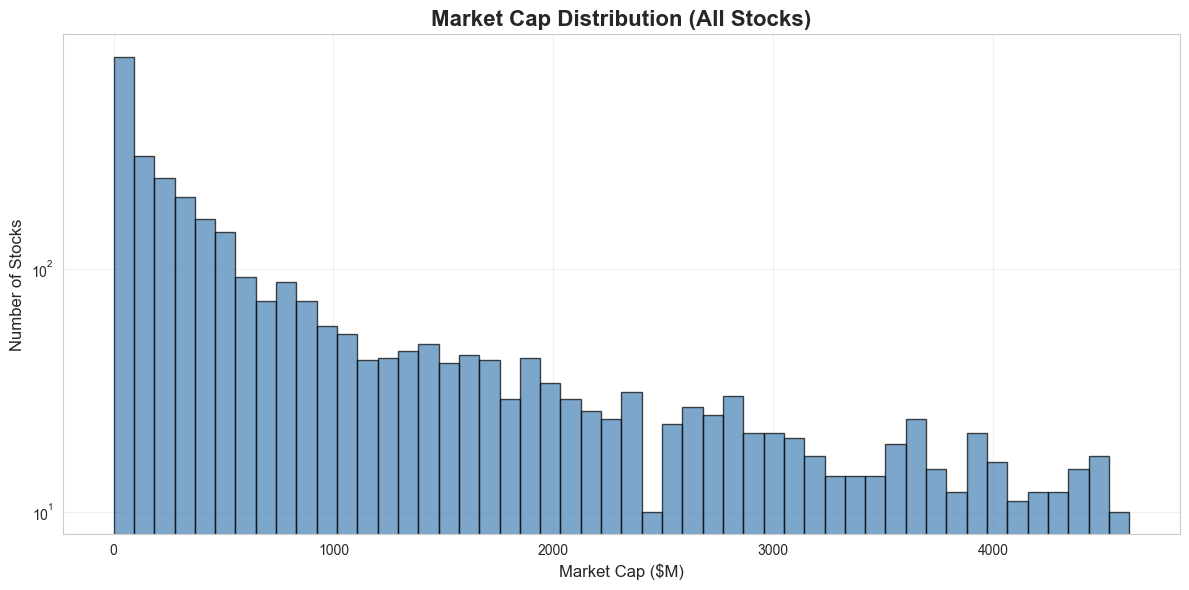

In [9]:
# Chart 4: Market Cap Distribution (Histogram with log scale)
plt.figure(figsize=(12, 6))
plt.hist(df['MktCap'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Market Cap ($M)', fontsize=12)
plt.ylabel('Number of Stocks', fontsize=12)
plt.title('Market Cap Distribution (All Stocks)', fontsize=16, fontweight='bold')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(chart_dir / 'marketcap_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/rb/2_p27zj97cx0lq1ww30fhqlc0000gp/T/ipykernel_44628/3374912034.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SectorCode', y='MktCap', order=sector_order, palette='Set2')


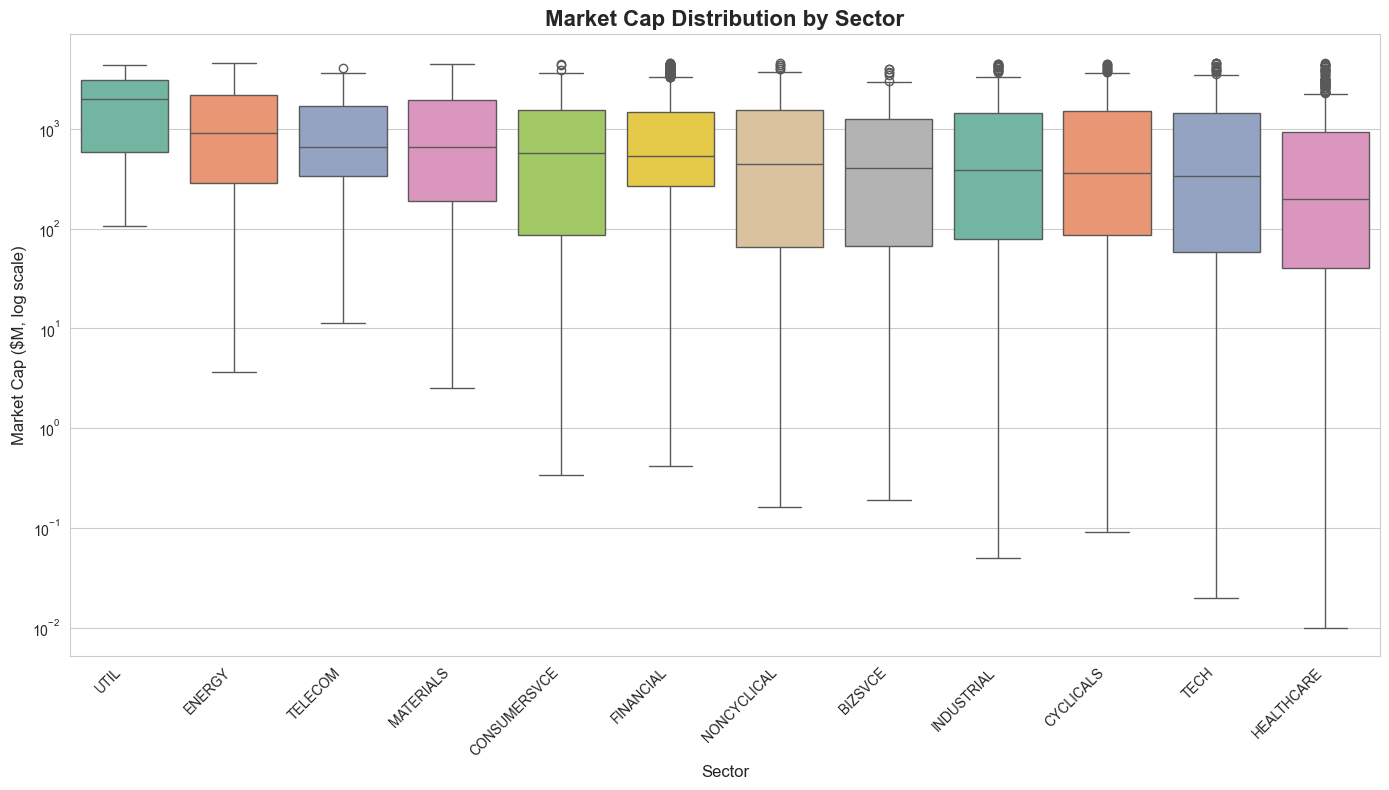

In [10]:
# Chart 5: Market Cap by Sector (Box Plot)
plt.figure(figsize=(14, 8))
# Sort sectors by median market cap for better visualization
sector_order = df.groupby('SectorCode')['MktCap'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='SectorCode', y='MktCap', order=sector_order, palette='Set2')
plt.yscale('log')
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Market Cap ($M, log scale)', fontsize=12)
plt.title('Market Cap Distribution by Sector', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(chart_dir / 'marketcap_by_sector_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

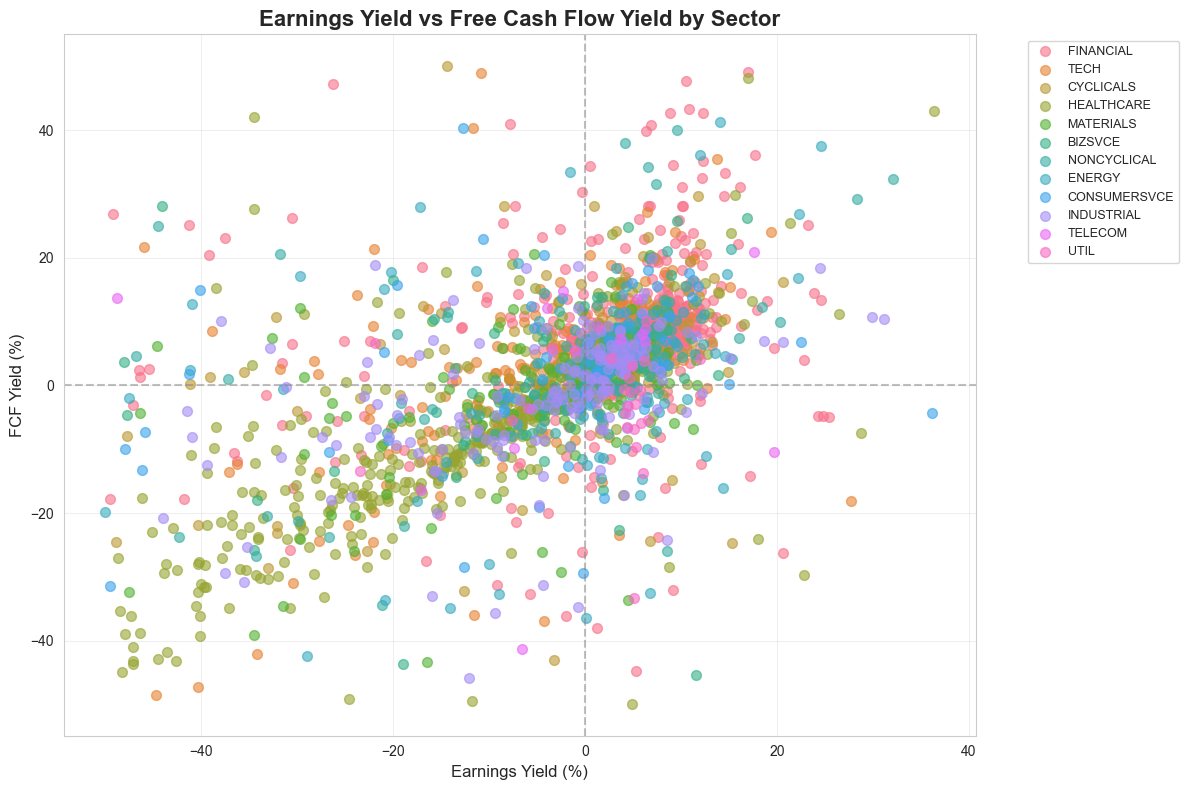

In [11]:
# Chart 6: Earnings Yield vs FCF Yield Scatter Plot
plt.figure(figsize=(12, 8))

# Filter out extreme outliers for better visualization
plot_df = df[(df['EarnYield'].between(-50, 50)) & (df['FCFYield'].between(-50, 50))].copy()

# Create scatter plot with color by sector
sectors = plot_df['SectorCode'].unique()
colors = sns.color_palette("husl", len(sectors))
sector_colors = dict(zip(sectors, colors))

for sector in sectors:
    sector_data = plot_df[plot_df['SectorCode'] == sector]
    plt.scatter(sector_data['EarnYield'], sector_data['FCFYield'], 
                alpha=0.6, s=50, label=sector, color=sector_colors[sector])

plt.xlabel('Earnings Yield (%)', fontsize=12)
plt.ylabel('FCF Yield (%)', fontsize=12)
plt.title('Earnings Yield vs Free Cash Flow Yield by Sector', fontsize=16, fontweight='bold')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(chart_dir / 'yield_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Create PowerPoint Presentation

In [12]:
# Create PowerPoint presentation
prs = Presentation()
prs.slide_width = Inches(10)
prs.slide_height = Inches(7.5)

# Slide 1: Title Slide
slide = prs.slides.add_slide(prs.slide_layouts[6])  # Blank layout

# Add title
title_box = slide.shapes.add_textbox(Inches(1), Inches(2.5), Inches(8), Inches(2))
title_frame = title_box.text_frame
title_frame.text = metadata["title"]
title_frame.paragraphs[0].font.size = Pt(40)
title_frame.paragraphs[0].font.bold = True
title_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

# Add date
date_box = slide.shapes.add_textbox(Inches(1), Inches(3.8), Inches(8), Inches(0.5))
date_frame = date_box.text_frame
date_frame.text = f"Analysis Date: {metadata['date']}"
date_frame.paragraphs[0].font.size = Pt(20)
date_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

# Add footer
footer_box = slide.shapes.add_textbox(Inches(1), Inches(6.5), Inches(8), Inches(0.5))
footer_frame = footer_box.text_frame
footer_frame.text = f"Total Stocks: {total_stocks:,} | Total Market Cap: ${total_mktcap:,.2f}M"
footer_frame.paragraphs[0].font.size = Pt(14)
footer_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

print("Created Slide 1: Title")

Created Slide 1: Title


In [13]:
# Slide 2: Summary Statistics
slide = prs.slides.add_slide(prs.slide_layouts[6])

# Title
title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.5), Inches(9), Inches(0.6))
title_frame = title_box.text_frame
title_frame.text = "Universe Summary Statistics"
title_frame.paragraphs[0].font.size = Pt(32)
title_frame.paragraphs[0].font.bold = True

# Statistics
stats_text = f"""
Total Number of Stocks: {total_stocks:,}

Total Market Cap: ${total_mktcap:,.2f}M

Average Market Cap: ${avg_mktcap:,.2f}M

Median Market Cap: ${median_mktcap:,.2f}M

Number of Sectors: {num_sectors}
"""

stats_box = slide.shapes.add_textbox(Inches(1.5), Inches(1.5), Inches(7), Inches(5))
stats_frame = stats_box.text_frame
stats_frame.text = stats_text.strip()
for paragraph in stats_frame.paragraphs:
    paragraph.font.size = Pt(24)
    paragraph.space_after = Pt(18)

print("Created Slide 2: Summary Statistics")

Created Slide 2: Summary Statistics


In [14]:
# Slide 3: Sector Distribution
slide = prs.slides.add_slide(prs.slide_layouts[6])

# Title
title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.3), Inches(9), Inches(0.5))
title_frame = title_box.text_frame
title_frame.text = "Stock Count by Sector"
title_frame.paragraphs[0].font.size = Pt(28)
title_frame.paragraphs[0].font.bold = True

# Add chart
left = Inches(0.5)
top = Inches(1)
width = Inches(9)
height = Inches(6)
slide.shapes.add_picture(str(chart_dir / 'sector_distribution.png'), left, top, width=width, height=height)

print("Created Slide 3: Sector Distribution")

Created Slide 3: Sector Distribution


In [15]:
# Slide 4: Sector Market Cap
slide = prs.slides.add_slide(prs.slide_layouts[6])

# Title
title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.3), Inches(9), Inches(0.5))
title_frame = title_box.text_frame
title_frame.text = "Total Market Cap by Sector"
title_frame.paragraphs[0].font.size = Pt(28)
title_frame.paragraphs[0].font.bold = True

# Add chart
slide.shapes.add_picture(str(chart_dir / 'sector_marketcap.png'), Inches(0.5), Inches(1), 
                         width=Inches(9), height=Inches(6))

print("Created Slide 4: Sector Market Cap")

Created Slide 4: Sector Market Cap


In [16]:
# Slide 5: Top 20 Stocks
slide = prs.slides.add_slide(prs.slide_layouts[6])

# Title
title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.3), Inches(9), Inches(0.5))
title_frame = title_box.text_frame
title_frame.text = "Top 20 Stocks by Market Capitalization"
title_frame.paragraphs[0].font.size = Pt(28)
title_frame.paragraphs[0].font.bold = True

# Add chart
slide.shapes.add_picture(str(chart_dir / 'top_20_stocks.png'), Inches(0.5), Inches(1), 
                         width=Inches(9), height=Inches(6))

print("Created Slide 5: Top 20 Stocks")

Created Slide 5: Top 20 Stocks


In [17]:
# Slide 6: Market Cap Distribution
slide = prs.slides.add_slide(prs.slide_layouts[6])

# Title
title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.3), Inches(9), Inches(0.5))
title_frame = title_box.text_frame
title_frame.text = "Market Cap Distribution"
title_frame.paragraphs[0].font.size = Pt(28)
title_frame.paragraphs[0].font.bold = True

# Add chart
slide.shapes.add_picture(str(chart_dir / 'marketcap_distribution.png'), Inches(0.5), Inches(1), 
                         width=Inches(9), height=Inches(6))

print("Created Slide 6: Market Cap Distribution")

Created Slide 6: Market Cap Distribution


In [18]:
# Slide 7: Market Cap by Sector Box Plot
slide = prs.slides.add_slide(prs.slide_layouts[6])

# Title
title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.3), Inches(9), Inches(0.5))
title_frame = title_box.text_frame
title_frame.text = "Market Cap Distribution by Sector"
title_frame.paragraphs[0].font.size = Pt(28)
title_frame.paragraphs[0].font.bold = True

# Add chart
slide.shapes.add_picture(str(chart_dir / 'marketcap_by_sector_boxplot.png'), Inches(0.5), Inches(1), 
                         width=Inches(9), height=Inches(6))

print("Created Slide 7: Market Cap by Sector Box Plot")

Created Slide 7: Market Cap by Sector Box Plot


In [19]:
# Slide 8: Yield Comparison
slide = prs.slides.add_slide(prs.slide_layouts[6])

# Title
title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.3), Inches(9), Inches(0.5))
title_frame = title_box.text_frame
title_frame.text = "Earnings Yield vs Free Cash Flow Yield"
title_frame.paragraphs[0].font.size = Pt(28)
title_frame.paragraphs[0].font.bold = True

# Add chart
slide.shapes.add_picture(str(chart_dir / 'yield_comparison.png'), Inches(0.5), Inches(1), 
                         width=Inches(9), height=Inches(6))

print("Created Slide 8: Yield Comparison")

Created Slide 8: Yield Comparison


In [20]:
# Save the presentation
output_path = Path("results.pptx")
prs.save(output_path)
print(f"\n{'='*60}")
print(f"PowerPoint presentation created successfully!")
print(f"Location: {output_path.absolute()}")
print(f"Total slides: {len(prs.slides)}")
print(f"{'='*60}")


PowerPoint presentation created successfully!
Location: /Users/Lars/Documents/Python/VirtualPy/01 - General Projects/02 - Portfolio 123 Code/Universe_Review/results.pptx
Total slides: 8
